In [83]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from hyperopt import tpe
from hpsklearn import estimator, components
import sklearn.metrics
import sklearn.cross_validation as scv
from sklearn.datasets import fetch_mldata
import fonctions_auxiliaires as aux
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
abalone = fetch_mldata('abalone')
X = abalone.data
y = abalone.target


In [4]:
le = LabelEncoder()
X[0] = le.fit_transform(X[0])

In [5]:
X_train, X_test, y_train, y_test = scv.train_test_split(X, y, random_state=1)

In [6]:
X_train = np.ascontiguousarray(X_train)

### Main results

In [31]:
estim = estimator.hyperopt_estimator(classifier=components.any_classifier('clf'),algo=tpe.suggest, trial_timeout=120)

In [32]:
estim.fit(np.ascontiguousarray(X_train), y_train)

In [33]:
y = estim.predict(X_test)
metrics_aba = aux.metrics(estim, X_train, y_train, X_test, y_test, y)

In [34]:
metrics_aba

(0.50159642401021709, 0.11866028708133972, nan, nan, nan)

In [35]:
#Timestamp
aux.time_retriever(estim)

{0: 1482222236.0,
 1: 1482222237.0,
 2: 1482222239.0,
 3: 1482222239.0,
 4: 1482222245.0,
 5: 1482222251.0,
 6: 1482222258.0,
 7: 1482222379.0,
 8: 1482222382.0,
 9: 1482222423.0}

In [36]:
print(estim.best_model())

{'preprocs': (MinMaxScaler(copy=True, feature_range=(-1.0, 1.0)),), 'learner': RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.02846906608099642,
            max_leaf_nodes=None, min_samples_leaf=14, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2195, n_jobs=1,
            oob_score=False, random_state=2, verbose=False,
            warm_start=False), 'ex_preprocs': ()}


In [37]:
estim.trials.vals

{'clf': [1, 0, 1, 0, 3, 3, 2, 3, 2, 1],
 'clf.ada_boost.ada_boost_algo': [],
 'clf.ada_boost.ada_boost_learning_rate': [],
 'clf.ada_boost.ada_boost_n_estimators': [],
 'clf.ada_boost.ada_boost_rstate': [],
 'clf.extra_trees.etc_bootstrap': [0, 1, 1],
 'clf.extra_trees.etc_criterion': [0, 1, 0],
 'clf.extra_trees.etc_max_depth': [0, 2, 0],
 'clf.extra_trees.etc_max_features': [3, 3, 3],
 'clf.extra_trees.etc_max_features.frac': [0.23601647182811603,
  0.3186978789394399,
  0.6446829367588663],
 'clf.extra_trees.etc_min_samples_leaf': [1, 0, 1],
 'clf.extra_trees.etc_min_samples_leaf.gt1': [2.0, 2.0],
 'clf.extra_trees.etc_n_estimators': [477.0, 848.0, 112.0],
 'clf.extra_trees.etc_rstate': [4, 1, 1],
 'clf.grad_boosting.gradient_boosting_learning_rate': [],
 'clf.grad_boosting.gradient_boosting_max_depth': [],
 'clf.grad_boosting.gradient_boosting_max_features': [],
 'clf.grad_boosting.gradient_boosting_max_features.frac': [],
 'clf.grad_boosting.gradient_boosting_min_samples_leaf': []

In [38]:
classifiers = estim.trials.trials[9]['misc']['vals']
classifiers

{'clf': [1],
 'clf.ada_boost.ada_boost_algo': [],
 'clf.ada_boost.ada_boost_learning_rate': [],
 'clf.ada_boost.ada_boost_n_estimators': [],
 'clf.ada_boost.ada_boost_rstate': [],
 'clf.extra_trees.etc_bootstrap': [],
 'clf.extra_trees.etc_criterion': [],
 'clf.extra_trees.etc_max_depth': [],
 'clf.extra_trees.etc_max_features': [],
 'clf.extra_trees.etc_max_features.frac': [],
 'clf.extra_trees.etc_min_samples_leaf': [],
 'clf.extra_trees.etc_min_samples_leaf.gt1': [],
 'clf.extra_trees.etc_n_estimators': [],
 'clf.extra_trees.etc_rstate': [],
 'clf.grad_boosting.gradient_boosting_learning_rate': [],
 'clf.grad_boosting.gradient_boosting_max_depth': [],
 'clf.grad_boosting.gradient_boosting_max_features': [],
 'clf.grad_boosting.gradient_boosting_max_features.frac': [],
 'clf.grad_boosting.gradient_boosting_min_samples_leaf': [],
 'clf.grad_boosting.gradient_boosting_min_samples_leaf.gt1': [],
 'clf.grad_boosting.gradient_boosting_n_estimators': [],
 'clf.grad_boosting.gradient_boosti

TypeError: unorderable types: float() <= NoneType()

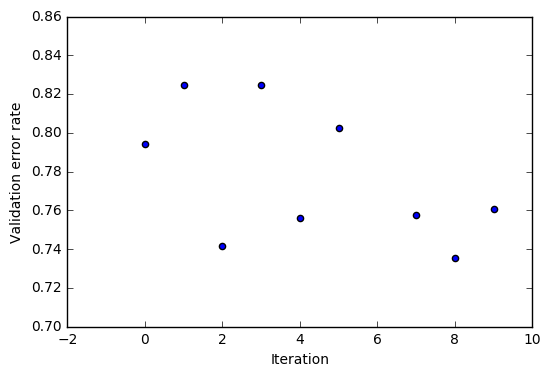

In [39]:
aux.plot_perft_perf(estim)

### Intermediate results

In [7]:
estim_iter = estimator.hyperopt_estimator(classifier=components.any_classifier('clf'),algo=tpe.suggest, trial_timeout=120)

In [41]:
predictions, accuracies = aux.fit_intermediate(estim_iter, X_train, y_train, X_test, y_test)

Trial 1 loss: None
Trial 2 loss: 0.8022328548644339
Trial 3 loss: 0.7862838915470495
Trial 4 loss: 0.9505582137161085
Trial 5 loss: 0.7559808612440191
Trial 6 loss: 0.7352472089314195
Trial 7 loss: 0.7320574162679425
Trial 8 loss: 0.7910685805422648
Trial 9 loss: 0.736842105263158
Trial 10 loss: 0.799043062200957
Test accuracy: 0.24019138756
Predict: [ 8  9  9 ..., 10  5  9]
Best Model: {'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=False),), 'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.7620258540405801,
            max_leaf_nodes=None, min_samples_leaf=49, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=1,
            oob_score=False, random_state=4, verbose=False,
            warm_start=False), 'ex_preprocs': ()}
====End of demo====


In [86]:
metrics_iter = []
for i in range(0, len(predictions)-1):
    y = predictions[i]
    metrics_iter.append(aux.metrics(estim_iter, X_train, y_train, X_test, y_test, y))


In [87]:
metrics_iter

[(0.33780332056194123, 0.24019138755980862, nan, nan, nan),
 (0.33780332056194123, 0.24019138755980862, nan, nan, nan),
 (0.33780332056194123, 0.24019138755980862, nan, nan, nan),
 (0.33780332056194123, 0.24019138755980862, nan, nan, nan),
 (0.33780332056194123, 0.24019138755980862, nan, nan, nan),
 (0.33780332056194123, 0.24019138755980862, nan, nan, nan),
 (0.33780332056194123, 0.24019138755980862, nan, nan, nan),
 (0.33780332056194123, 0.24019138755980862, nan, nan, nan),
 (0.33780332056194123, 0.24019138755980862, nan, nan, nan)]

In [44]:
accuracies

[0.25550239234449762,
 0.18373205741626794,
 0.16459330143540671,
 0.16459330143540671,
 0.23923444976076555,
 0.092822966507177029,
 0.24019138755980862,
 0.24019138755980862,
 0.24019138755980862,
 0.24019138755980862]

In [45]:
list_clf =['svc', 'knn', 'random_forest', 'extra_trees', 'ada_boost', 'gradient_boosting', 'sgd']
lis_clf_num =

In [69]:
clf_iter = estim_iter.trials.vals['clf']
clf_iter_name = []

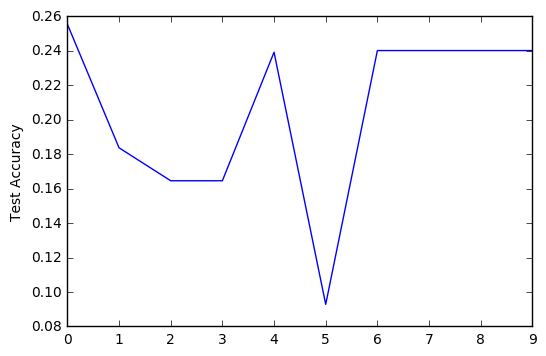

In [85]:
plt.plot(accuracies)
plt.ylabel('Test Accuracy')
plt.show()

TypeError: unorderable types: NoneType() <= float()

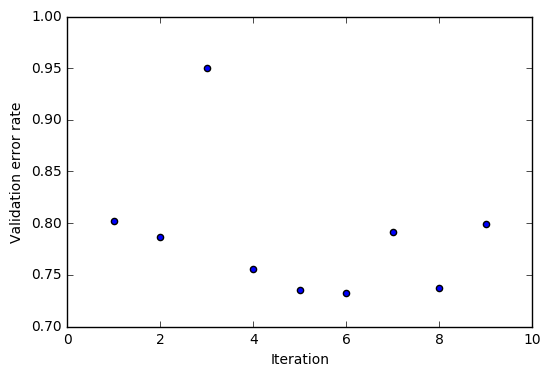

In [89]:
aux.plot_perf(estim_iter)

In [ ]:
classifiers = pd.DataFrame.from_dict(classifiers, 'index')

In [ ]:
classifiers.columns = ['parameters']

In [ ]:
classifiers.sort_index()
classifier1 = classifiers.ix[~(classifiers.parameters.isnull())].sort_index()

In [ ]:
classifier1